In [1]:
# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras
import os.path
from saveDataset import save_data

# Helper libraries
import numpy as np
from numpy import genfromtxt
import matplotlib.pyplot as plt
import glob, os
import re

# Pillow
import PIL
from PIL import Image

from numpy import loadtxt
from keras.models import load_model

maxsize = 150 , 150



Using TensorFlow backend.


In [2]:
model = keras.models.Sequential([
                keras.layers.Flatten(input_shape = ( maxsize)),
                keras.layers.Dense(512, activation=tf.nn.relu),
                keras.layers.Dropout(0.5),
                keras.layers.Dense(128, activation=tf.nn.relu),
                keras.layers.Dense(16, activation=tf.nn.relu),
        keras.layers.Dense(2, activation=tf.nn.softmax)
        ])

model.load_weights('my_model_weights.h5')


In [3]:
# Use Pillow library to convert an input jpeg to a 8 bit grey scale image array for processing.
def jpeg_to_8_bit_greyscale(path, maxsize):
        img = Image.open(path).convert('L')   # convert image to 8-bit grayscale
        # Make aspect ratio as 1:1, by applying image crop.
    # Please note, croping works for this data set, but in general one
    # needs to locate the subject and then crop or scale accordingly.
        WIDTH, HEIGHT = img.size
        if WIDTH != HEIGHT:
                m_min_d = min(WIDTH, HEIGHT)
                img = img.crop((0, 0, m_min_d, m_min_d))
        # Scale the image to the requested maxsize by Anti-alias sampling.
        img.thumbnail(maxsize, PIL.Image.ANTIALIAS)
        return np.asarray(img)

In [4]:
def load_image_dataset(path_dir, maxsize):
        images = []
        labels = []
        os.chdir(path_dir)
        for file in glob.glob("*.jpg"):
                img = jpeg_to_8_bit_greyscale(file, maxsize)
#                 if re.match('chihuahua.*', file):
                if re.match('plastic.*', file):
                        images.append(img)
                        labels.append(0)
#                 elif re.match('muffin.*', file):
                elif re.match('paper.*', file):
                        images.append(img)
                        labels.append(1)
                else:
                    images.append(img)
                    labels.append(1)
        return (np.array(images), np.array(labels))

In [5]:
def display_images(images, labels):
        plt.figure(figsize=(10,10))
        grid_size = min(25, len(images))
        for i in range(grid_size):
                plt.subplot(5, 5, i+1)
                plt.xticks([])
                plt.yticks([])
                plt.grid(False)
                plt.imshow(images[i], cmap=plt.cm.binary)
                plt.xlabel(class_names[labels[i]])

In [6]:
# class_names = ['chihuahua', 'muffin']
class_names = ['plastic', 'not_plastic']




(5, 150, 150)
(5,)
[[1.0000000e+00 0.0000000e+00]
 [1.0000000e+00 0.0000000e+00]
 [0.0000000e+00 1.0000000e+00]
 [0.0000000e+00 1.0000000e+00]
 [4.1855877e-04 9.9958140e-01]]


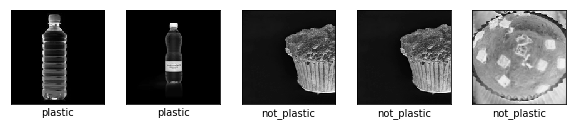

In [7]:
os.chdir('D:\hackathon\image_classification')
(test_image, label) = load_image_dataset('D:/hackathon/image_classification/unknown', maxsize)
print(test_image.shape)
print(label.shape)


predictions=model.predict(test_image)
print(predictions)
display_images(test_image, np.argmax(predictions, axis = 1))
plt.show()
 

*****in 'validation_matrix' if the i'th value is 1 then the i'th element is plastic

In [10]:
print(predictions.shape)
validation_matrix = np.zeros(predictions.shape[0])
for i in range(predictions.shape[0]):
    if predictions[i,0]>=.5:
        validation_matrix[i] = 1
        

print(validation_matrix)


(5, 2)
[1. 1. 0. 0. 0.]
